In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

## PARTE 1

In [151]:
# Punto 1

# lectura URL
url = 'https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv'
df = pd.read_csv(url)


In [152]:
#Punto 2
df.index=pd.to_datetime(df.time)

In [153]:
#Punto 4
df.isnull().sum().sum()

0

In [154]:
# Punto 5
df.rename(columns=lambda x: x.capitalize(), inplace=True)

In [155]:
# Punto 6

# Parte a
# Creación nueva columna con diferenciales
df['Diff']=df['Close'].diff()

In [156]:
# Union de columnas Close y Diff
df2=df[['Close','Diff']][1:]
df2

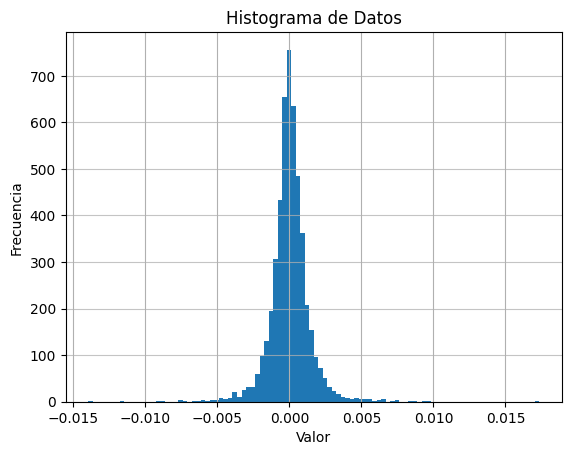

In [157]:
# Parte b
# Creación de histograma
df2.Diff.hist(bins=100)
plt.title('Histograma de Datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

(14613.527947910232,
 27360.991772190286,
 -0.20964563672636735,
 0.6022017125608812)

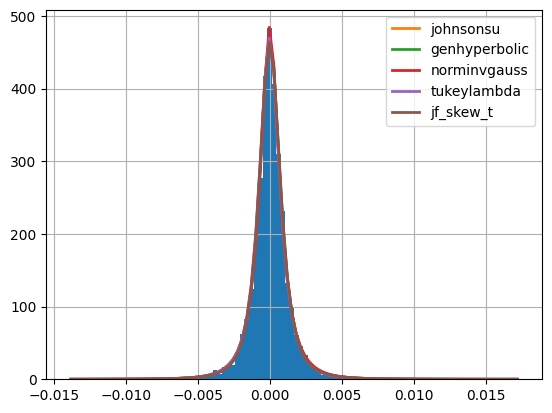

In [255]:
#Parte c
# Distribución estadistica que mejor se ajusta
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(df2.Diff,
           distributions=['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'jf_skew_t',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'multivariate_normal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',
 'rel_breitwigner',
 'rice',
 'rv_continuous',
 'rv_histogram',
 'semicircular',
 'skewcauchy',
 'skewnorm',
 'studentized_range',
 't',
 'trapezoid',
 'trapz',
 'triang',
 'truncexpon',
 'truncnorm',
 'truncpareto',
 'truncweibull_min',
 'tukeylambda',
 'uniform',
 'vonmises',
 'vonmises_fisher',
 'vonmises_line',
 'wald',
 'weibull_max',
 'weibull_min',
 'wrapcauchy'])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

In [159]:
#Punto 7

# Selección de datos con datetime

df['Time'] = pd.to_datetime(df['Time'])

año_select=2023
df['año']=df['Time'].dt.year
filtro=df[df['año']==año_select]
filtro

In [ ]:
# Punto 8

# Agrupación y promedio de los datos con groupby

p7=df.groupby(pd.Grouper(key='Time', freq='7D')).mean()
p15=df.groupby(pd.Grouper(key='Time', freq='15D')).mean()
pm=df.groupby(pd.Grouper(key='Time', freq='1M')).mean()



In [ ]:
# Punto 9

# Histograma para cada mes

df.groupby(pd.Grouper(key='Time', freq='1M')).agg({'Close': ['count', 'sum', 'mean']})

# Ciclo para crear cada gráfico

for fecha, grupo in df.groupby(pd.Grouper(key='Time', freq='1M')) :
    plt.figure()
    plt.hist(grupo['Close'], bins=10, alpha=0.7)
    plt.title(f'Histograma para {fecha.strftime("%Y-%m")}')
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.grid()
    plt.show()

## PARTE 2

In [ ]:
# Punto 1

# Lectura de datos
# Se uso la extención y el recurso de python dado en la página
URL1= 'https://archive.ics.uci.edu/static/public/17/data.csv'
df1=pd.read_csv(URL1)
df1

In [211]:
# Punto 2

# Renombrar formato PascalCase
df1.rename(columns=lambda x: x.capitalize(), inplace=True)
df1

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
# Punto 3

#Obtención de información el dataframe
df1.head()

In [ ]:
df1.tail()

In [ ]:
df1.describe()

In [ ]:
df1.info()

In [29]:
# Punto 4

# Valores Nulos
# Para reemplazar valores nulos se usaria la función fillna para reemplazarlos por cero
df1.isnull().sum().sum()

0

In [32]:
df1.isna().sum().sum()

0

In [175]:
# Punto 5
# Identificación de valores únicos en la columna Diagnosis
target=df1['Diagnosis'].unique()

<Axes: xlabel='Diagnosis', ylabel='count'>

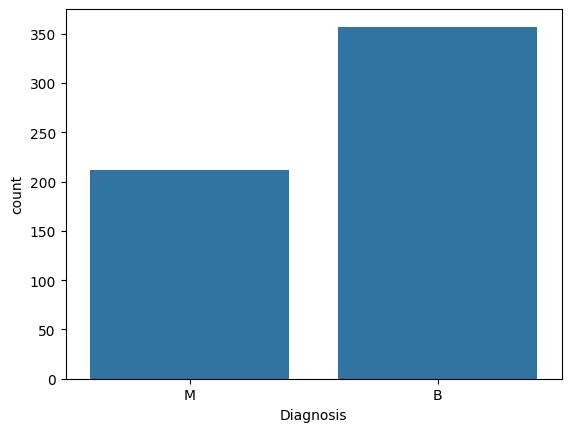

In [176]:
# Punto 6
# Conteo y graficación de los valores  etiquetados como B y M
sns.countplot(data=df1, x='Diagnosis')

In [177]:
# Punto 7

# Nueva columna DiagnosisNumeric y mapeo de valores b y m como 0 y 1, recpectivamente
df1[' DiagnosisNumeric']=df1['Diagnosis'].map({'M':1,'B':0})

In [ ]:
# Punto 8
#Normalizacion recpecto a la media y desviación de cada columna


# Selección de columnas a normalizar
columnas_a_normalizar = df1.select_dtypes(include='number').columns

# Calculo de media y desviación
media=df1[columnas_a_normalizar].mean()
desviacion_estandar=df1[columnas_a_normalizar].std()

# Print
df_normal=(df1-media)/desviacion_estandar

In [219]:
# Punto 9

# Agrupación de caracteristicas similares y promedio

# Se filtra todas las columnas con patrones concernientes a cada promedio pedido
# Se promedia
# Se añade la nueva columna con los promedios
columnas_a1 = df1.filter(like="Radius").columns
promedio_a1 = df1[columnas_a1].mean(axis=1)
df1["RadiusMean"] = promedio_a1
#2
columnas_a2 = df1.filter(like="Texture").columns
promedio_a2 = df1[columnas_a2].mean(axis=1)
df1["TextureMean"] = promedio_a2
#3
columnas_a3 = df1.filter(like="Perimeter").columns
promedio_a3 = df1[columnas_a3].mean(axis=1)
df1["PerimeterMean"] = promedio_a3
#4
columnas_a4 = df1.filter(like="Area").columns
promedio_a4 = df1[columnas_a4].mean(axis=1)
df1["AreaMean"] = promedio_a4
#5
columnas_a5 = df1.filter(like="Smoothness1").columns
promedio_a5 = df1[columnas_a5].mean(axis=1)
df1["SmoothnessMean"] = promedio_a5
#6
columnas_a6 = df1.filter(like="Compactness").columns
promedio_a6 = df1[columnas_a6].mean(axis=1)
df1["CompactnessMean"] = promedio_a6
#7
columnas_a7 = df1.filter(like="Concavity").columns
promedio_a7 = df1[columnas_a7].mean(axis=1)
df1["ConcavityMean"] = promedio_a7
#8
columnas_a8 = df1.filter(like="Concave_points").columns
promedio_a8 = df1[columnas_a8].mean(axis=1)
df1["ConcavePointsMean"] = promedio_a8
#9
columnas_a9 = df1.filter(like="Symmetry").columns
promedio_a9 = df1[columnas_a9].mean(axis=1)
df1["SymmetryMean"] = promedio_a9
#10
columnas_a10 = df1.filter(like="Fractal_dimension").columns
promedio_a10 = df1[columnas_a10].mean(axis=1)
df1["FractalDimensionMean"] = promedio_a10

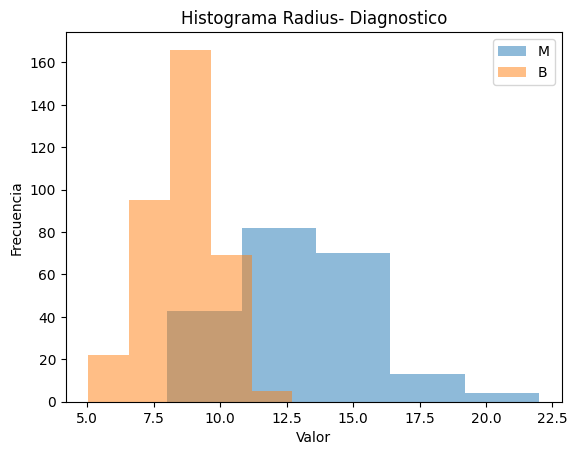

In [215]:
# Punto 10

# Grafico radiusmean- diagnosis
#colores para cada categoría
colores = {'M': 'blue', 'B': 'orange'}
# Iteración para cada que a cada etiqueta se le asigne un color especifico
for diagnosis, color in colores.items():
    subset = df1[df1['Diagnosis'] == diagnosis]
    subset.groupby('Diagnosis')['RadiusMean'].plot(kind='hist', alpha=0.5, legend=True, bins=5)

# Configuración de etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma Radius- Diagnostico')
plt.show()

In [244]:
data = pd.DataFrame()

features = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean',
            'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean']

for feature in features:
    pattern = re.compile(rf'^{feature[:-4]}')

    matching_columns = [col for col in df_normal.columns if pattern.match(col)]

    data[feature] = df_normal[matching_columns].mean(axis=1)

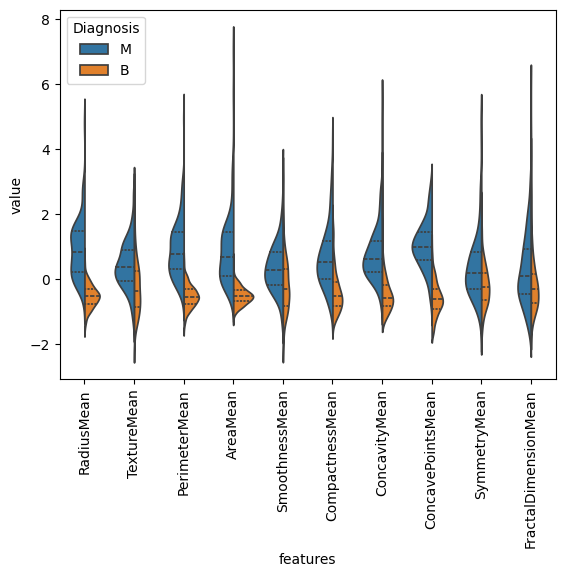

In [248]:
# Punto 11

#Generación de graficos de violin para multiples caracteristicas
# Se eligen las columnas de los promedios
# Se toma como id_vars RadiusMean
# Se gráfica
data['Diagnosis'] = df1['Diagnosis']
data1 = pd.melt(data,id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis",data=data1, split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Punto 12

# Dterminación y leiminación de valores atipicos
# Construcción de boxplot

df1.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

In [ ]:
# Rando  Intercuartílico (IQR) para definir los outliers
Q1 = df1['RadiusMean'].quantile(0.25)
Q3 = df1['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1
df = df1[~((df1['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df1['RadiusMean'] > (Q3 + 1.5 * IQR)))]
df

In [ ]:
import scipy.stats as stats # import the stats module from scipy
df = df1[(np.abs(stats.zscore(df1['RadiusMean'])) < 3)]
df

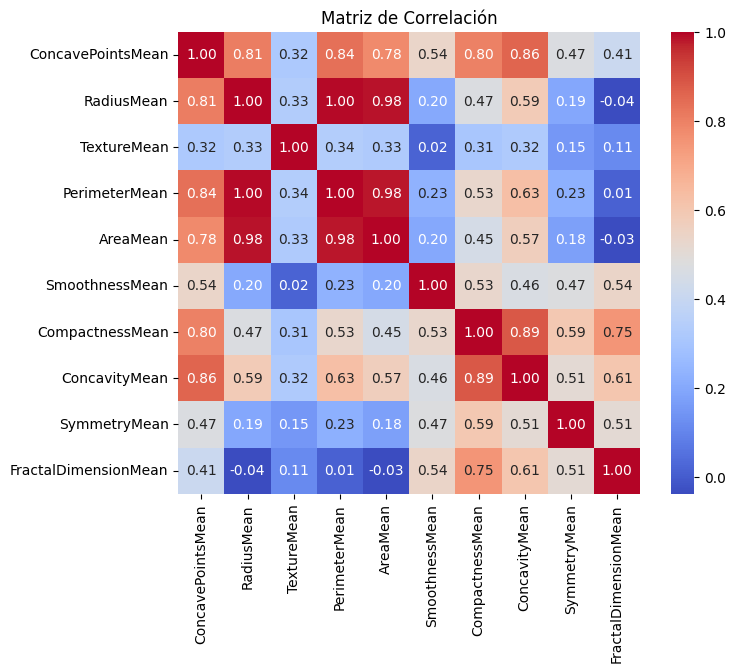

In [251]:
# Punto 13

# Matrix de correlación y gráfico
# Se toman solo las columnas de los promedios
corr_matrix = df1.iloc[:, 32:50].corr()

# Grafica
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

Text(0.5, 0, 'RadiusMean')

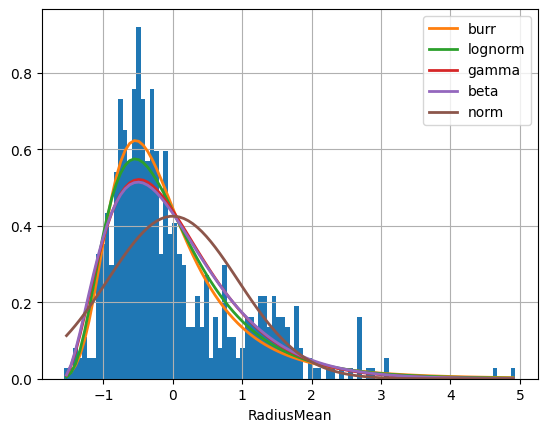

In [252]:
# Punto 14

f = Fitter(data.RadiusMean,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]


plt.xlabel('RadiusMean')